# Perceptron, SVMs

authors : Jean-Christophe CORVISIER, Amine KHELDOUNI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tools import *

## Implémentation du perceptron

0.242451504693 0.0 ()
[ 0.23669596  0.22885137  0.23702581] (3,) (3,)
0 [ 0.]
score en train :  1.0
score en test :  1.0


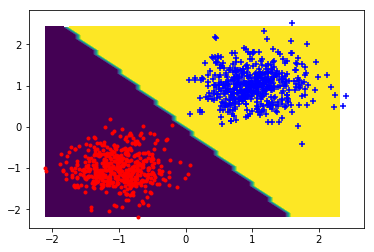

In [5]:
class Perceptron:
    def __init__(self,max_iter = 1000,eps=1e-3,projection = None):
        self.max_iter = max_iter
        self.eps = eps
        self.projection = projection or (lambda x: x) #projection fonction identite par default

    def fit(self,data,y):
        data = self.projection(data)
        self.w = np.random.random((1,data.shape[1]))
        self.histo_w  = np.zeros((self.max_iter,data.shape[1]))
        self.histo_f = np.zeros((self.max_iter,1))
        ylab=set(y.flat)
        if len(ylab)!=2:
            print("pas bon nombres de labels (%d)" % (ylab,))
            return
        self.labels = {-1: min(ylab), 1:max(ylab)}
        y = 2*(y!=self.labels[-1])-1
        i=0
        while i<self.max_iter:
            idx = range(len(data))
            for j in idx:
                self.w = self.w - self.get_eps()*self.loss_g(data[j],y[j:(j+1)])
            self.histo_w[i]=self.w
            self.histo_f[i]=self.loss(data, y)
            if i % 100==0: print(i,self.histo_f[i])
            i+=1
    def predict(self,data):
        data = self.projection(data)
        return np.array([self.labels[x] for x in np.sign(data.dot(self.w.T)).flat]).reshape((len(data),))
    def score(self,data,y):
        return np.mean(self.predict(data)==y)
    def get_eps(self):
        return self.eps
    def loss(self,data,y):
        return hinge(self.w,data,y)
    def loss_g(self,data,y):
        return grad_hinge(self.w,data,y)

    
def hinge(w, data, y, alpha=0):
    data, y, w = data.reshape(len(y), -1), y.reshape(-1, 1), w.reshape(1, -1)
    return np.mean(np.maximum(0, -y * data.dot(w.T)))

def grad_hinge(w, data, y, alpha=0):
    data, y, w = data.reshape(len(y), -1), y.reshape(-1, 1), w.reshape(1, -1)
    return -np.mean(((-y * data.dot(w.T) >= 0)) * data * y, 0)
    
### Test des fonctions hinge, grad_hinge
w = np.random.random((3,))
data = np.random.random((100,3))
y = np.random.randint(0,2,size = (100,1))*2-1

print(hinge(w,data,y), hinge(w,data[0],y[0]), hinge(w,data[0,:],y[0]).shape)
print(grad_hinge(w,data,y), grad_hinge(w,data[0],y[0]).shape,grad_hinge(w,data[0,:],y[0]).shape)

### Generation de donnees
xtrain,ytrain = gen_arti(data_type=0,epsilon=0.2)
xtest,ytest = gen_arti(data_type=0,epsilon=0.2)

plt.ion()

### Apprentissage
model=Perceptron(max_iter=100, eps=1e-3)
model.fit(xtrain,ytrain)
print("score en train : ",model.score(xtrain,ytrain))
print("score en test : ",model.score(xtest,ytest))

#### Tracer de frontiere
plt.figure()
plot_frontiere(xtrain, model.predict,50)
plot_data(xtrain,ytrain)


## Données USPS

In [6]:

def load_usps(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
    """ l : liste des chiffres a extraire"""
    if type(l)!=list:
        resx = datax[datay==l,:]
        resy = datay[datay==l]
        return resx,resy
    tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
    tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
    idx = np.random.permutation(range(len(tmpy)))
    return tmpx[idx,:],tmpy[idx]

def show_usps(data):
    plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="inferno")


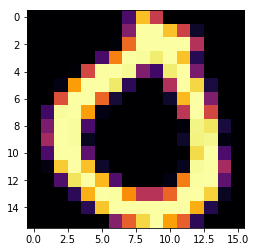

0 [ 0.14082462]
100 [ 0.00489843]
200 [ 0.00192536]
300 [ 0.]
400 [ 0.]
score en train :  1.0
score en test :  0.438144329897


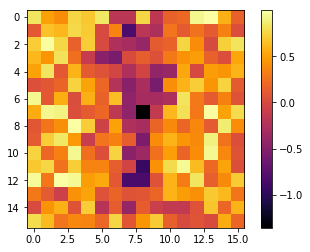

In [7]:
#Question 2.1

xuspstrain,yuspstrain = load_usps("USPS_train.txt")
xuspstest,yuspstest = load_usps("USPS_test.txt")
# 6 vs 9
xtrain,ytrain = get_usps([6,1],xuspstrain,yuspstrain)
xtest,ytest = get_usps([0,1,6,9],xuspstest,yuspstest)
show_usps(xtest[0])
plt.show()

model=Perceptron(max_iter=500, eps=1e-3)
model.fit(xtrain, ytrain)
print("score en train : ",model.score(xtrain,ytrain))
print("score en test : ",model.score(xtest,ytest))

show_usps(model.w)
plt.colorbar()

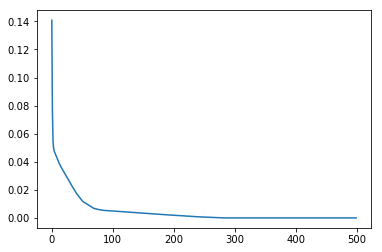

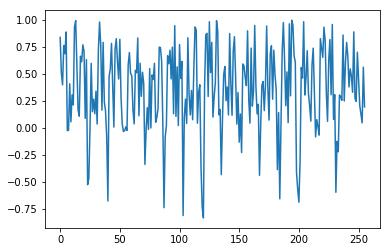

In [8]:
# Question 2.2

plt.plot(model.histo_f)
plt.show()
plt.plot(model.histo_w[1])
plt.show()

## Expressivité et feature map

In [9]:
# Question 3.1

xtrain,ytrain = gen_arti(data_type=1,epsilon=0.2)
xtest,ytest = gen_arti(data_type=1,epsilon=0.2)

plt.ion()

model=Perceptron(max_iter=400, eps=1e-3)
model.fit(xtrain,ytrain)
print("score en train : ",model.score(xtrain,ytrain))
print("score en test : ",model.score(xtest,ytest))


0 [ 0.23933116]
100 [ 0.00099248]
200 [ 0.00088552]
300 [ 0.00103861]
score en train :  0.5
score en test :  0.5


# COMMENTAIRE

0 [ 0.00428049]
100 [ 0.00040009]
200 [ 0.00010525]
300 [ 0.00016762]
400 [ 0.00013003]
score en train :  0.99
score en test :  0.983


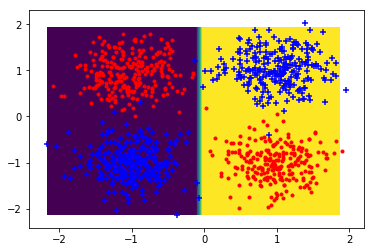

In [13]:
# Question 3.2

def poly(x):
    vect_poly = np.zeros((x.shape[0],6))
    vect_poly[:,0] = np.array([1]*x.shape[0])
    vect_poly[:,1] = x[:,0]
    vect_poly[:,2] = x[:,1]
    vect_poly[:,3] = x[:,0] * x[:,1]
    vect_poly[:,4] = x[:,0] * x[:,0]
    vect_poly[:,5] = x[:,1] * x[:,1]
    return vect_poly

model = Perceptron(max_iter=500, eps=1e-2, projection=poly)
model.fit(xtrain, ytrain)

print("score en train : ",model.score(xtrain,ytrain))
print("score en test : ",model.score(xtest,ytest))

plt.figure()
plot_frontiere(xtrain, lambda x : model.predict(poly(x)))
plot_data(xtrain,ytrain)